## for ica and histograms of the atom array loading. 
a superset notebook of the atom_array_analysis_20211210 nb.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
import csv
import os,sys
from sklearn.decomposition import FastICA
from scipy.optimize import curve_fit
from time import time
from numpy.random import random as rand

imdir = os.path.join('.','trap_array_data')
sys.path.append(os.path.join(imdir))
print("images saved in", imdir)

# for matplotlib labels
fontsize=14

def savefigure(fname):
    assert len(fname.split(".")), "fname should have exactly one period '.', before the extension"
    fname = fname.split('.')
    fname = fname[0] + '_' +str(int(10000*rand())) + '.' + fname[1]
    filepath = os.path.join(imdir,fname)
    plt.savefig(filepath, bbox_inches='tight')
    print("saved file to",filepath)
    
plt.rcParams['font.size'] = '14'

images saved in .\trap_array_data


In [2]:
def from_csv(fname):
    """convert raveled csv data back into an array of 512 x 512 arrays"""
    with open(fname) as f:
        reader = csv.reader(f, delimiter=',')
        my_data = np.array([row for row in reader])
    data = np.array([np.reshape(x, (512,512)) for x in my_data])
    return data

def from_npy(fname):
    data = np.squeeze(np.load(fname))
    return data

def ica_project(images, components=None, whiten=True):
    """Independent component analysis. returns the data projected on the ICA"""
    X = images.reshape(
        images.shape[0],
        images.shape[1] * images.shape[2]
    ).astype(float)
    
    if components == None:
        components=len(images)
    
    ica = FastICA(n_components=components, max_iter=2000, whiten=whiten)
    ica.fit(X)
    A_ica = ica.components_  # Get estimated mixing matrix
    image_sum = np.sum(np.abs(A_ica),axis=0).reshape(images.shape[1], images.shape[2])
    return image_sum

In [3]:
t0 = time()
bg = from_npy(imdir+'/'+'background_20211210.npy')
time() - t0
print("np.load from npy: ", time()-t0)

np.load from npy:  0.3724544048309326


In [4]:
t0 = time()
img = from_npy(imdir+'/'+'images_20211210.npy')
time() - t0
print("np.load from npy: ", time()-t0)

np.load from npy:  0.3236989974975586


1.6225155649151086 0.8679295449572283
saved file to .\trap_array_data\average_no_ica_20211210_full_array_Reds_no_frame_4651.svg


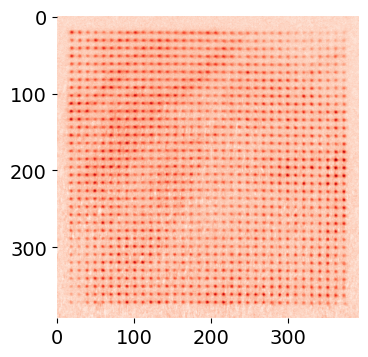

In [5]:
plt.figure(dpi=100)
norm = img[5:].mean(0)/bg[5:].mean(0)
# norm /= np.amax(norm)
print(np.amax(norm),np.amin(norm))
plt.imshow(norm,cmap='Reds',vmin=0.16)#,vmax=0.24)
xmin = 81-8-3 #100
xmax = -55+8-2 #476
ymin = 39-8-2 #40
ymax = 415+8-1 # 350
crop_img = img[4:300,ymin:ymax,xmin:xmax]
crop_bg = bg[4:300,ymin:ymax,xmin:xmax]
plt.imshow(crop_img.mean(0)/crop_bg.mean(0),cmap='Reds')#,vmin=0.2)
plt.box(on=None)
# plt.show()
fname = f'average_no_ica_20211210_full_array_Reds_no_frame.svg'
# savefigure(fname)

In [14]:
crop_img.shape, crop_img.shape[0]

((296, 375, 375), 296)

saved file to .\trap_array_data\single_shot5_20211210_full_array_Reds_no_frame_8772.svg


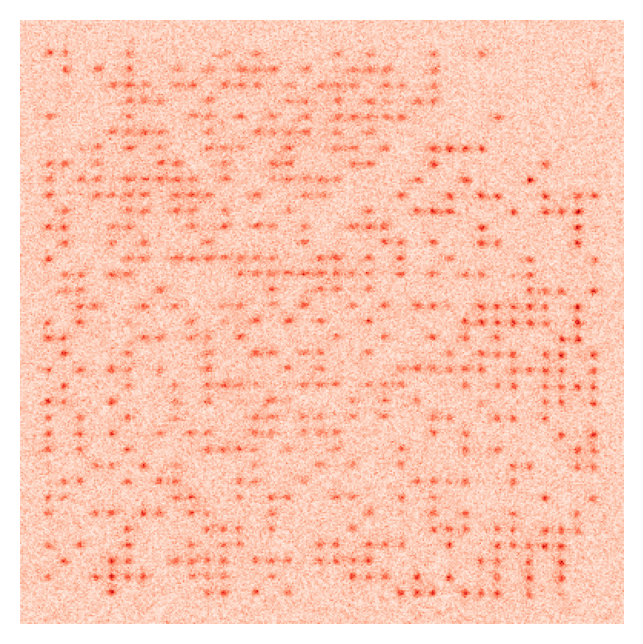

In [13]:
## single shot
plt.figure(dpi=200)
nn = 5
plt.imshow(crop_img[nn]/crop_bg.mean(0),cmap='Reds')#'gist_heat')#,vmin=0.2)
plt.xticks([])
plt.yticks([])
plt.box(on=None)
# fname = f'single_shot{nn}_20211210_full_array_Reds_no_frame.svg'
savefigure(fname)

## subarray ICA

### 25 sub arrays

1.6225155649151086 0.8679295449572283
(296, 375, 375)


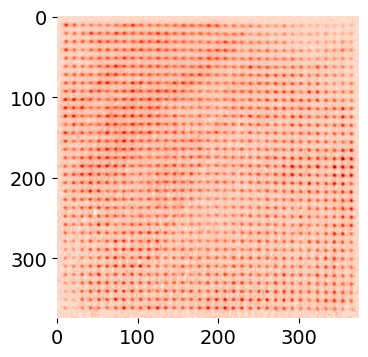

In [60]:
plt.figure(dpi=100)
norm = img[5:].mean(0)/bg[5:].mean(0)
# norm /= np.amax(norm)

print(np.amax(norm),np.amin(norm))
plt.imshow(norm,cmap='Reds')#,vmin=0.16)#,vmax=0.24)
xmin = 78 #100
xmax = -59 #476
ymin = 39 #40
ymax = -98 # 350
crop_img = img[4:300,ymin:ymax,xmin:xmax]
crop_bg = bg[4:300,ymin:ymax,xmin:xmax]
print(crop_img.shape)
plt.imshow(crop_img.mean(0)/crop_bg.mean(0),cmap='Reds')#,vmin=0.2)
plt.box(on=None)
# plt.show()
fname = f'average_no_ica_20211210_full_array_Reds_no_frame.svg'
# savefigure(fname)

In [61]:
crop_img.shape

(296, 375, 375)

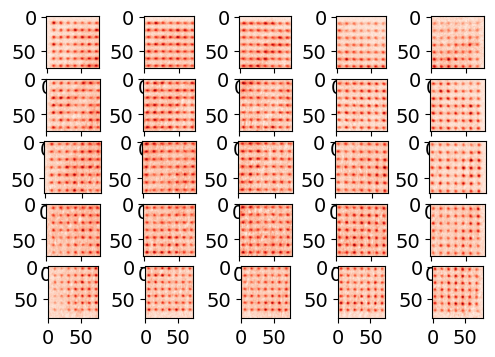

In [62]:
slices = 5
fig,axes = plt.subplots(nrows=slices,ncols=slices,dpi=100)
wdy = int(crop_img.shape[1]/slices)
wdx = int(crop_img.shape[2]/slices)

# offset the sub roi bounds to avoid clipping
dwy = [0,1,0,-4,-5,0] # first digit is unused and should be 0
dwx = [0,2,0,0,-2,0]

for i in range(slices):
    for j in range(slices):
        idx_x1 = j*wdx+dwx[j]
        idx_x2 = (j+1)*wdx+dwx[j+1]
        idx_y1 = i*wdy+dwy[i]
        idx_y2 = (i+1)*wdy+dwy[i+1]
        axes[i,j].imshow((crop_img.mean(0)/crop_bg.mean(0))[idx_y1:idx_y2,
                                                            idx_x1:idx_x2],
                                                            cmap='Reds')#,vmin=0.1

In [47]:
sites_arr = np.array([[7*7,7*7,7*7,7*7,7*7],
                      [7*7,7*7,7*7,7*7,7*7],
                      [7*7,7*7,7*7,7*7,7*7],
                      [7*7,7*7,7*7,7*7,7*7],
                      [7*7,7*7,7*7,7*7,7*7],
                     ])
assert np.sum(sites_arr) == 1225

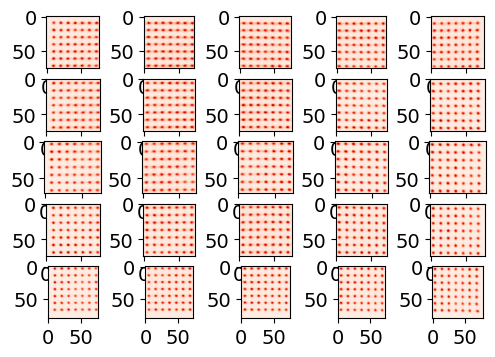

In [94]:
fig,axes = plt.subplots(nrows=slices,ncols=slices,dpi=100)

ica_img = np.empty(crop_img[0].shape,float)

frames = 300

for i in range(slices):
    for j in range(slices):
        
        idx_x1 = j*wdx+dwx[j]
        idx_x2 = (j+1)*wdx+dwx[j+1]
        idx_y1 = i*wdy+dwy[i]
        idx_y2 = (i+1)*wdy+dwy[i+1]
        
        sub_img = crop_img[:frames, idx_y1:idx_y2, idx_x1:idx_x2]/crop_bg[:frames, idx_y1:idx_y2, idx_x1:idx_x2].mean(0)
        ica_sub = ica_project(sub_img,whiten=True, components=sites_arr[i,j])
        ica_img[idx_y1:idx_y2, idx_x1:idx_x2] = ica_sub
        
        axes[i,j].imshow(ica_sub,cmap='Reds')

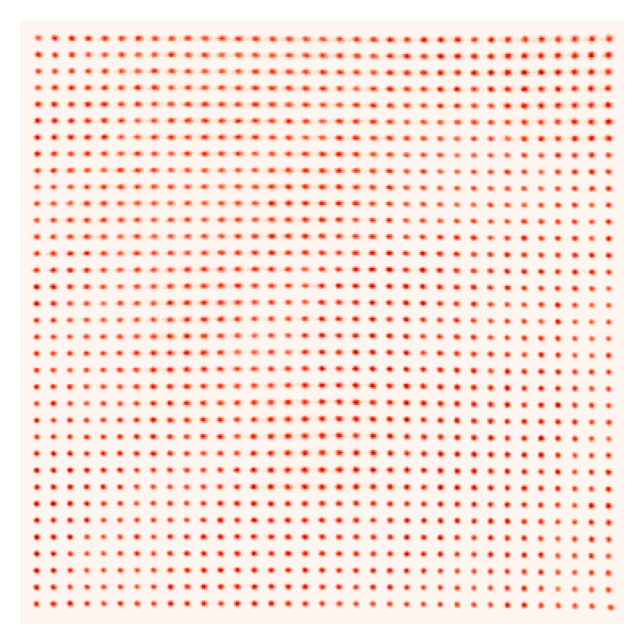

In [95]:
plt.figure(dpi=200)
plt.imshow(ica_img/np.amax(ica_img),cmap='Reds',vmin=0.2)#,vmin=0.0375)#,vmax=0.11)
# plt.imshow(ica_img,cmap='gist_heat',vmin=0.02)#,vmin=0.0375)#,vmax=0.11)
# plt.imshow(ica_img,cmap='hot',vmin=0.02)#,vmin=0.0375)#,vmax=0.11)
# plt.xlim((0,365))
# plt.ylim((0,365))

plt.xticks([])
plt.yticks([])
plt.box(on=None)
# fname = './'+imdir+'/ica_img_20211210_full_array_reds_no_frame.svg'
# plt.savefig(fname,bbox_inches='tight')
# print(f"wrote file to {fname}")
# fname = f'ica_img_20211210_full_array_reds_no_frame_clipped_20percent.svg'
# savefigure(fname)

In [642]:
np.amin(ica_img), np.amax(ica_img)

(0.005366842340577125, 0.08039928987130439)

## use the ICA mask to calculate the loading in each frame

In [78]:
 # unbox the ica projection routine to use the mixing matrix
def ica_mask(images, components=None, whiten=True):
    """Independent component analysis. returns the mixing matrix. 
    needs to be reshaped to (images.shape[1], images.shape[2])"""
    X = images.reshape(
        images.shape[0],
        images.shape[1] * images.shape[2]
    ).astype(float)

    if components == None:
        components=len(images)

    ica = FastICA(n_components=components, max_iter=2000, whiten=whiten)
    ica.fit(X)
    A_ica = ica.components_  # Get estimated mixing matrix
#     image_sum = np.sum(np.abs(A_ica),axis=0).reshape(images.shape[1], images.shape[2])
    return A_ica

In [79]:
# count loading in each frame for each subregion.

# fig,axes = plt.subplots(nrows=slices,ncols=slices,dpi=100)

ica_img = np.empty(crop_img[0].shape,float)

frames = 300
slices = 1

for i in range(slices):
    for j in range(slices):
        
        idx_x1 = j*wdx+dwx[j]
        idx_x2 = (j+1)*wdx+dwx[j+1]
        idx_y1 = i*wdy+dwy[i]
        idx_y2 = (i+1)*wdy+dwy[i+1]
        
        sub_img = crop_img[:frames, idx_y1:idx_y2, idx_x1:idx_x2]/crop_bg[:frames, idx_y1:idx_y2, idx_x1:idx_x2].mean(0)
        ica_sub = ica_project(sub_img,whiten=True, components=sites_arr[i,j])
        ica_sub /= np.amax(ica_sub)
#         ica_img[idx_y1:idx_y2, idx_x1:idx_x2] = ica_sub
#         axes[i,j].imshow(ica_sub,cmap='Reds')

In [80]:
sub_img.shape

(296, 76, 77)

pixels per atom = 0.8466624209653362
guessed num atoms = 15, actual = 17
pixels per atom = 0.9355551703088797
guessed num atoms = 12, actual = 15
pixels per atom = 0.6450075998446194
guessed num atoms = 17, actual = 15
pixels per atom = 0.7712503908510749
guessed num atoms = 20, actual = 21
pixels per atom = 0.6555701050571449
guessed num atoms = 18, actual = 16
pixels per atom = 0.6862297195124608
guessed num atoms = 19, actual = 18
pixels per atom = 0.6636503361583366
guessed num atoms = 16, actual = 14
pixels per atom = 0.6304679306443635
guessed num atoms = 22, actual = 19
pixels per atom = 0.7207326168360818
guessed num atoms = 22, actual = 21
pixels per atom = 0.6952053077070218
guessed num atoms = 16, actual = 15
mean counts/atom: 0.725033159788532
err mean: 0.6, err std: 1.8547236990991405


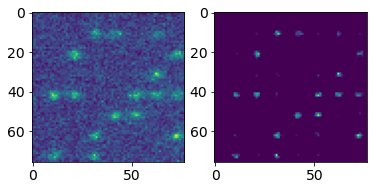

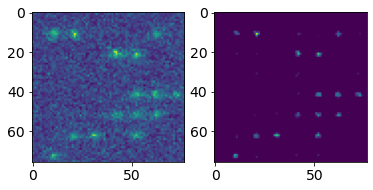

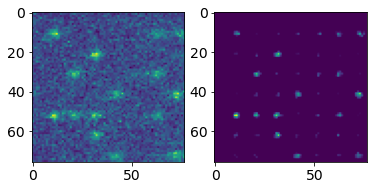

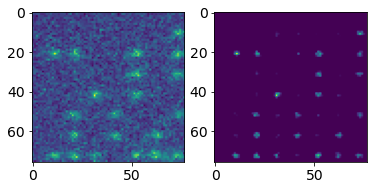

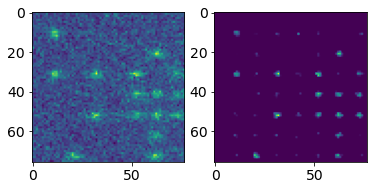

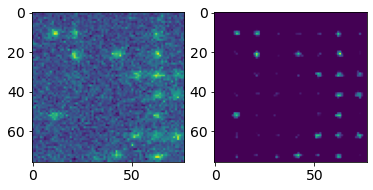

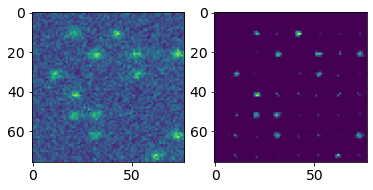

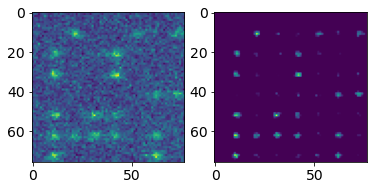

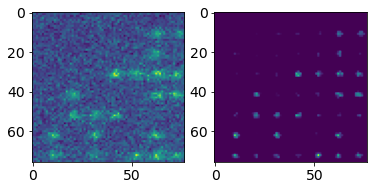

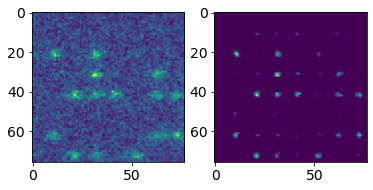

In [81]:
num_atoms = [17,15,15,21,16,18,14,19,21,15] # count by eye to calibrate the pixel count per atom
meancpa = 0.7387960016506965 # from the calc below
err = []

cperatom = [] # counts per atom
for i in range(10):
    fig,axes = plt.subplots(nrows=1,ncols=2)
    ax1,ax2 = axes
    ax1.imshow(sub_img[i,:,:]/np.amax(sub_img[i,:,:]))
    ica_clip = (sub_img[i,:,:]/np.amax(sub_img[i,:,:]))*ica_sub - 0.36
    ica_clip[ica_clip < 0 ] = 0 # clip the image so only the brightest points, which are very likely atoms, remain
    cax=ax2.imshow(ica_clip)
    counts = np.sum(ica_clip)
    cperatom.append(num_atoms[i]/counts)
    print(f"pixels per atom = {cperatom[i]}")
    
    # check:
    atoms_est = int(meancpa*counts+0.5)
    print(f"guessed num atoms = {atoms_est}, actual = {num_atoms[i]}")
    err.append(atoms_est - num_atoms[i])
    
#     fig.colorbar(cax)

meancpa = np.mean(cperatom)
print(f"mean counts/atom: {np.mean(cperatom)}")
print(f"err mean: {np.mean(err)}, err std: {np.std(err)}")

In [92]:
# now, use this to estimate the number of atoms in each frame.

meancpa = 0.7387960016506965 # mean counts per frame as calculated above
frames = crop_img.shape[0]
slices = 5

loaded_atoms = np.zeros((frames,slices,slices))

for i in range(slices):
    for j in range(slices):
        
        idx_x1 = j*wdx+dwx[j]
        idx_x2 = (j+1)*wdx+dwx[j+1]
        idx_y1 = i*wdy+dwy[i]
        idx_y2 = (i+1)*wdy+dwy[i+1]
        
        sub_img = crop_img[:frames, idx_y1:idx_y2, idx_x1:idx_x2]/crop_bg[:frames, idx_y1:idx_y2, idx_x1:idx_x2].mean(0)
        ica_sub = ica_project(sub_img,whiten=True, components=sites_arr[i,j])
        ica_sub /= np.amax(ica_sub)
        
        for k in range(frames):
            ica_clip = (sub_img[k,:,:]/np.amax(sub_img[k,:,:]))*ica_sub - 0.36
            ica_clip[ica_clip < 0] = 0 # clip the image so only the brightest points, which are very likely atoms, remain
            counts = np.sum(ica_clip)
            loaded_atoms[k,i,j] = int(meancpa*counts+0.5)

In [83]:
total_loaded = np.zeros(frames)
for k in range(frames):
    for i in range(slices):
        for j in range(slices):
            total_loaded[k] += loaded_atoms[k,i,j]

385.8716216216216


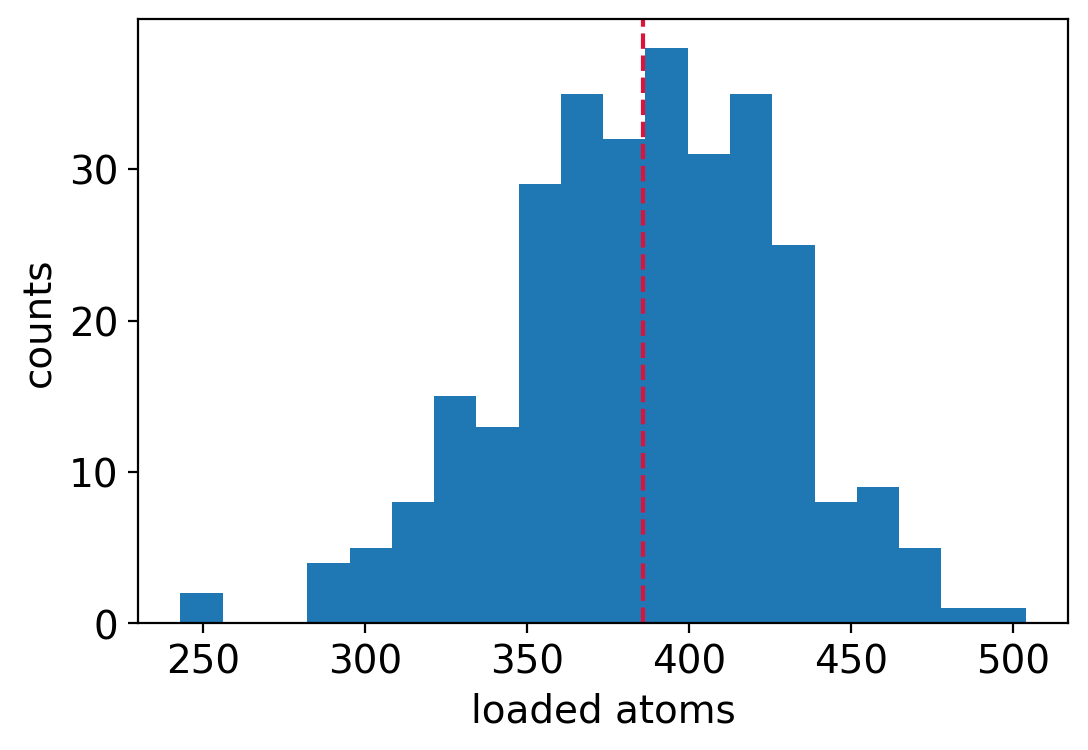

In [84]:
fig,ax = plt.subplots(dpi=200)
ax.hist(total_loaded,bins=20)
ax.set_xlabel('loaded atoms')
ax.set_ylabel('counts')
meanloaded = np.mean(total_loaded)
ax.axvline(meanloaded,linestyle='--',color='crimson')
print(meanloaded)
# plt.savefig(os.path.join(imdir,'loading_hist_1225_site_array_20220228.png'))

In [104]:
meanloaded/1225

0.3146662989520132

In [106]:
imdir

'trap_array_data'

## histogram grid
Gaussian fit to get ROIs and then generate histograms. run the cells that generate the big ICA image before running what is below.

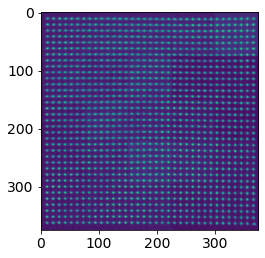

In [96]:
plt.imshow(ica_img)

### upper right of the array

### middle of the array

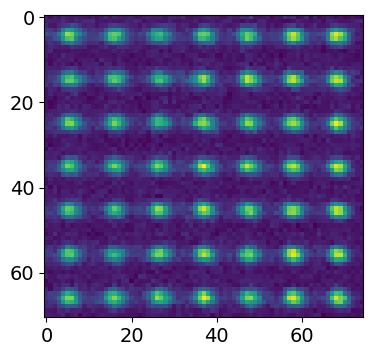

In [163]:
i = 2 #0
j = 2 #4
idx_x1 = j*wdx+dwx[j]
idx_x2 = (j+1)*wdx+dwx[j+1]
idx_y1 = i*wdy+dwy[i]
idx_y2 = (i+1)*wdy+dwy[i+1]

sub_stack = crop_img[:,idx_y1:idx_y2, idx_x1:idx_x2]
sub_img = ica_img[idx_y1:idx_y2, idx_x1:idx_x2]

plt.figure(dpi=100)
subarr = sub_img
subarr /= np.amax(subarr)
plt.imshow(subarr)

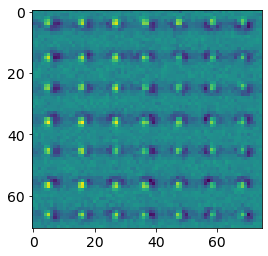

In [217]:
# Gaussian fit to this image to get ROIs
# g2d = lambda x,y,mux,muy,sx,sy,t: exp(-((x*cos(t)-y*sin(t)-mux)/sx)**2-((y*cos(t)+x*sin(t)-muy)/sy)**2)
g2d = lambda x,y,mux,muy,sx,sy,t: exp(-((x*cos(t)-y*sin(t)-int(mux+0.5))/sx)**2-((y*cos(t)+x*sin(t)-int(muy+0.5))/sy)**2)

def model(uu,mux,mx,muy,my,sx,sy,t,n=7,m=7):
    """2D grid of Gaussians"""
    
    x,y = uu
    zpts = zeros(x.shape)
    for i in range(n):
        for j in range(m):
            zpts += g2d(x,y,mux+j*mx,muy+i*my,sx,sy,t)
    
    return zpts.ravel() # must be 1d to work with scipy curve fit
#     return np.sum([[g2d(x,y,mux+j,muy+i,sx,sy,t) for i in range(n)] for j in range(m)])

ym,xm = subarr.shape

xpts = linspace(0,xm,xm)
ypts = linspace(0,ym,ym)
xx,yy = meshgrid(xpts,ypts)
sx = sy = 1.5
t = -0.000
mux = 5.3
muy = 4
mx = 10.7
my = 10.5
zpts = model((xx,yy),mux,mx,muy,my,sx,sy,t)
plt.imshow(zpts.reshape(xx.shape) - subarr)

In [218]:
popt, pcov = curve_fit(model,(xx,yy),subarr.ravel(),
                               bounds=([5,5,1,5,0,0,-0.05],
                                       [15,15,15,15,3,3,0.05]),
                      p0=[mux,mx,muy,my,sx,sy,t])
mux,mx,muy,my,sx,sy,t = popt

In [219]:
popt

array([ 5.30000002e+00,  1.05524837e+01,  3.80045931e+00,  1.05226090e+01,
        3.00000000e+00,  2.47588183e+00, -1.34501564e-03])

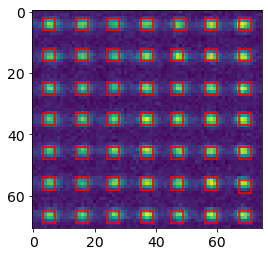

In [234]:
# t = 0.002
# mux = 4
# muy = 11
# mx = 10.5#$0.8
# my = 10.3
# the centers of the sites to the nearest integer pair

def draw_roi(ax,x,y,col='red'):
    """draw roi"""
    right = x+2
    left = x-2
    top = y+2
    bottom = y-2
    ax.plot([right,left],[top,top],color=col)
    ax.plot([right,left],[bottom,bottom],color=col)
    ax.plot([right,right],[bottom,top],color=col)
    ax.plot([left,left],[bottom,top],color=col)

xc = lambda i,j: int((i*my+muy-(cos(t)*(i*my*cos(t)+muy*cos(t)-j*mx*sin(t)-mux*sin(t))))/sin(t) + 0.5)
yc = lambda i,j: int(i*my*cos(t)+muy*cos(t)-j*mx*sin(t)-mux*sin(t) + 0.5)
            
fig,ax = plt.subplots()
ax.imshow(subarr)
# ax.scatter([xc(i,j) for i in range(7) for j in range(7)],[yc(i,j) for i in range(7) for j in range(7)],c='red',
#             marker='.',linewidth=0.002)
            
            
centroids = [(xc(i,j),yc(i,j)) for i in range(7) for j in range(7)]
for cent in centroids:
    draw_roi(ax,*cent)

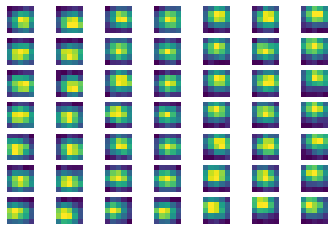

In [235]:
## use these centroids to generate histograms for each site; check the site subarrays

# centroids = [(xc(i,j),yc(i,j)) for i in range(7) for j in range(7)]

fig,axes = plt.subplots(nrows=7,ncols=7)
for i,cent in enumerate(centroids):
    y0,x0 = cent
    axes[i%7,i//7].imshow(subarr[x0-2:x0+3,y0-2:y0+3])
    axes[i%7,i//7].set_axis_off()

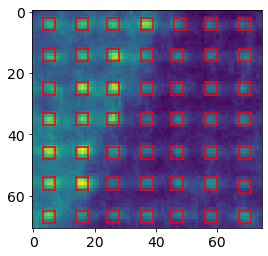

In [242]:
fig,ax = plt.subplots()
for cent in centroids:
    draw_roi(ax,*cent)
ax.imshow(np.mean(sub_stack,axis=0))

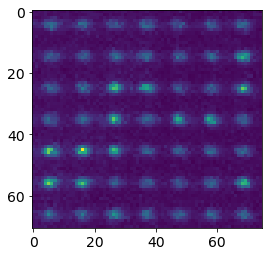

In [250]:
plt.imshow(sub_stack[0])
plt.imshow(sub_img*sub_stack[0])

121428 292675


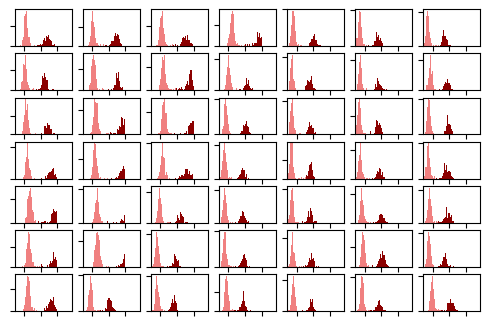

In [288]:
## use these centroids to generate histogram and corresponding fits for each site

fit = True # set to false for debugging
if fit: # this will raise an undefined error if you do not first run with fit=false
    xmin = mincnt
    xmax = maxcnt 
else:
    mincnt = inf
    maxcnt = 0

c1 = 'lightcoral'
c2 = 'darkred'

loading = [] # the loading rate for each site

plt.close()

# guess for the fit
u = 50
v = 20
mu = 155000
mv = 215000
if fit:
    mv = [215000]*49 #[184500]*19 + [186000] + [184500]*29 # this is used for different guesses for different sites
wu = 7000
wv = 10000

def model(counts,a,b,ma,mb,wa,wb):
    """
    histogram fit. neglect two atom loading
    
    a,b: amplitudes of the distributions
    ma,b: the x offsets
    wa,b: the dist widths
    """
    return a*exp(-((counts-ma)/wa)**2) + b*exp(-((counts-mb)/wb)**2)

rows = cols = 7 # 7 is the max, bc 49 site sub arrays
bins = np.linspace(100000,250000,50)# 'auto'

centroids = [(xc(i,j),yc(i,j)) for i in range(cols) for j in range(rows)]

fig,axes = plt.subplots(nrows=rows,ncols=cols,dpi=100)

for i,cent in enumerate(centroids):
    y0,x0 = cent
    
    roi_stack = sub_stack[:,x0-2:x0+3,y0-2:y0+3]

#     roi_stack = (crop_img[:])[:,yc-2:yc+3,xc-2:xc+3]
    counts = np.array([np.sum(frame) for frame in roi_stack])

    if fit:
        line = axes[i//rows,i%cols].hist(counts,bins=bins)
        axes[i//rows,i%cols].clear()

        xpts = line[1][:-1]
        ypts = line[0]
        popt, pcov = curve_fit(model,xpts,ypts,
                                       bounds=([10,10,1e5,1.5e5,5000,5000],
                                               [50,50,2e5,3.5e5,15000,15000]),
                              p0=[u,v,mu,mv[i],wu,wv],
                              method='dogbox')
    #     a,b,ma,mb,wa,wb = popt
    #     axes[i//rows,i%cols].plot(xpts,model(xpts,*popt))

        cutoff = (popt[2] + popt[3])/2
    #     axes[i//rows,i%cols].axvline(cutoff)
        no_atom = [x for x in counts if x < cutoff]
        atom = [x for x in counts if x >= cutoff]
        loading.append(len(atom)/len(counts))

        axes[i//rows,i%cols].hist(no_atom, bins=bins,color=c1)
        axes[i//rows,i%cols].hist(atom, bins=bins,color=c2)
    else:
        axes[i//rows,i%cols].hist(counts,bins=bins,color='green')
        mi = min(counts)
        ma = max(counts)
        if mi < mincnt:
            mincnt = mi
        if ma > maxcnt:
            maxcnt = ma
            
        xpts = linspace(139132,250770,40)
        axes[i//rows,i%cols].plot(xpts,model(xpts,u,v,mu,mv,wu,wv))
    
for ax in axes.ravel():
    ax.yaxis.set_ticklabels([])
    if fit:
        ax.xaxis.set_ticklabels([])
        ax.set_xlim((xmin,xmax))
    else:
        ax.set_xlim((mincnt,maxcnt))
print(mincnt,maxcnt)
#     ax.set_aspect(100000/50)
#     axes[i//rows,i%cols].set_axis_off()
# savefigure('histograms_49.svg')

In [290]:
mean(loading)

0.32866795366795365

### manual roi definition and fit tests

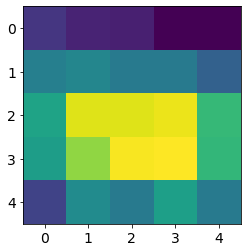

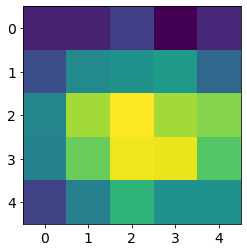

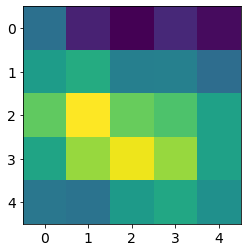

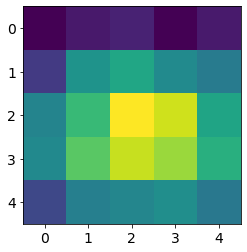

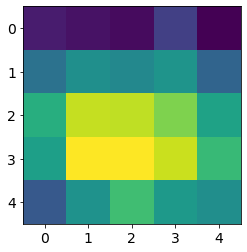

In [154]:
# xc = 158
# yc = 164

rois = [[164,166],[164,124],[164,135],[164,145],[164,156]]
for roi in rois:
    yc,xc = roi
    plt.imshow((crop_img.mean(0)/crop_bg.mean(0))[yc-2:yc+3,xc-2:xc+3])
    plt.show()

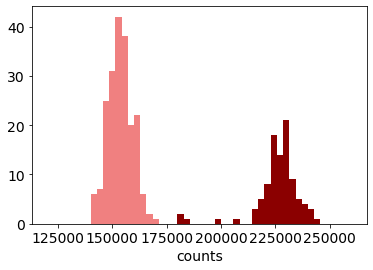

In [429]:
i=0
cuts = [180000]#,160000,168000,170000,170000]
# cuts = np.array([30,30,30,32,32])*(np.mean(crop_bg.mean(0)))

c1 = 'lightcoral'
c2 = 'darkred'

bins = np.linspace(120000,260000,50)
# bins = 'auto'#np.linspace(20,50,50)
for roi,cut in zip(rois,cuts):
    yc,xc = roi
#     roi_stack = (crop_img[:]/crop_bg.mean(0))[:,yc-2:yc+3,xc-2:xc+3]
    roi_stack = (crop_img[:])[:,yc-2:yc+3,xc-2:xc+3]

#     roi_stack = (crop_img[:])[:,yc-2:yc+3,xc-2:xc+3]
    counts = np.array([np.sum(frame) for frame in roi_stack])

#     fig,ax = plt.subplots()
#     ax.hist(counts,bins=np.linspace(20,45))
    cutoff = cut #30
    no_atom = [x for x in counts if x < cutoff]
    atom = [x for x in counts if x >= cutoff]

    fig,ax = plt.subplots() #dpi=200)
    line = ax.hist(counts,bins='auto');
    ax.clear()
    ax.hist(no_atom, bins=bins,color=c1)
    ax.hist(atom, bins=bins,color=c2)
    ax.set_xlabel('counts')
    ax.ticklabel_format(axis='x',style='sci')
#     plt.savefig('./trap_array_data/'+f'hist_more_bins_{i}.png',bbox_inches='tight')
    i += 1

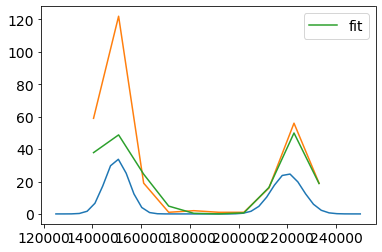

In [436]:
# fit a histogram

def model(counts,a,b,ma,mb,wa,wb):
    """histogram fit. neglect two atom loading"""
    return a*exp(-((counts-ma)/wa)**2) + b*exp(-((counts-mb)/wb)**2)

a = 34
b = 25
ma = 150000
mb = 220000
wa = 7000
wb = 9000
xpts = linspace(125000,250000,40)
plt.plot(xpts,model(xpts,a,b,ma,mb,wa,wb))

plt.plot(line[1][:-1],line[0])

xpts = line[1][:-1]
ypts = line[0]
popt, pcov = curve_fit(model,xpts,ypts,
                               bounds=([10,10,1e5,1.5e5,5000,5000],
                                       [50,50,2e5,3e5,15000,15000]),
                      p0=[a,b,ma,mb,wa,wb])
a,b,ma,mb,wa,wb = popt
plt.plot(xpts,model(xpts,a,b,ma,mb,wa,wb),label='fit')
plt.legend()

In [718]:
len(counts)

5

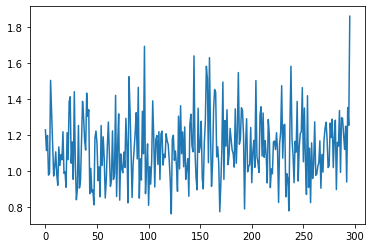

In [664]:
i = j = 1
subimg = (crop_img/crop_bg.mean(0))[:,i*93:(i+1)*93,j*93:(j+1)*93]
plt.plot(range(len(subimg)),subimg[:,7,4])
# plt.imshow(subimg.mean(0))

In [395]:
subimg[:100,7,4]

array([0.9095912 , 1.71528245, 1.04198587, 0.80195831, 1.13667792,
       1.17388281, 1.95207479, 0.89067767, 1.21258088, 1.19180089,
       0.97143345, 1.08180381, 0.85011314, 0.72058039, 0.93858364,
       1.01498432, 2.12055448, 1.07981292, 1.09038956, 0.98337883,
       0.92775814, 0.79063509, 1.95605659, 0.85023757, 1.01573091,
       0.9260161 , 0.8687778 , 0.90013444, 1.0809328 , 1.0088872 ,
       1.19814687, 1.81134324, 1.05778862, 0.9868629 , 1.95157707,
       1.89832057, 0.76238923, 1.31225018, 1.00453211, 0.99283559,
       0.93995238, 1.21046555, 0.9904714 , 1.71602903, 1.92992606,
       1.16007096, 0.85409494, 1.09810429, 1.15335169, 1.33526993,
       1.75771344, 1.11925757, 0.92838029, 1.07371579, 1.06562777,
       1.09598896, 1.04596766, 0.73065931, 1.07657771, 0.88408283,
       0.74795523, 0.7918794 , 2.31951977, 1.04447449, 0.96944255,
       0.97516638, 2.29538014, 0.89864126, 2.15937697, 2.59413917,
       1.14762786, 0.96110567, 0.84488704, 0.95438639, 2.14419

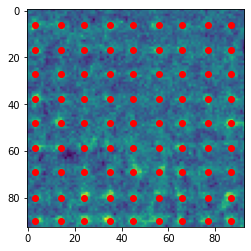

In [355]:
# fig,ax = plt.subplots()
plt.imshow(subimg.mean(0))
dx = 3
dy = 6
# for i in range(9):
#     plt.axvline(dx+i*10.5, linewidth=1, color='r')
# for j in range(9):
#     plt.axhline(dy+j*10.5, linewidth=1, color='r')

for i in range(9):
    for j in range(9):
        plt.scatter(int(dx+i*10.5+0.5), int(dy+j*10.5+0.5), marker='o',color='r')

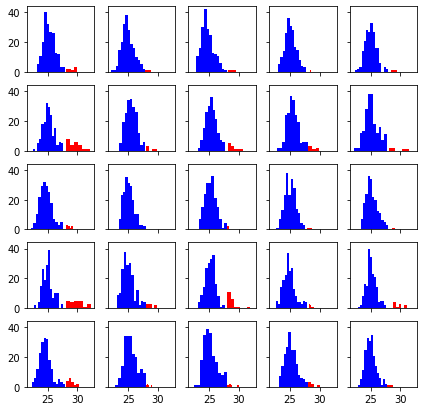

In [415]:
nx = ny = 2
nrows = ncols = 5
fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(7,7),sharex=True,sharey=True)
# fig.tight_layout()

for i in range(nrows):
    for j in range(ncols):
        roi_stack = subimg[:200,int(dx+i*10.5+0.5)-nx:int(dx+i*10.5+0.5)+nx+1, int(dy+j*10.5+0.5)-ny:int(dy+j*10.5+0.5)+ny+1]
        counts = np.array([np.sum(frame) for frame in roi_stack])
    
        cutoff = 28
        no_atom = [x for x in counts if x < cutoff]
        atom = [x for x in counts if x >= cutoff]
        
        axes[i,j].hist(no_atom, bins='auto',color='blue')
        axes[i,j].hist(atom, bins='auto',color='red')
#         axes[i,j].hist(counts,bins='auto',color='green')
#         axes[i,j].set_xlim((2,35))

(array([1.023e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 1.400e+01, 1.300e+0

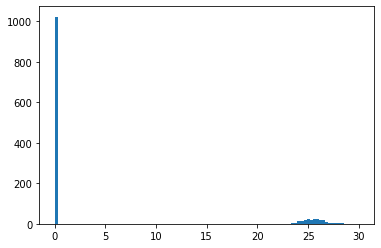

In [389]:
plt.hist(counts,bins=np.linspace(0,30,100))

In [387]:
no_atom

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

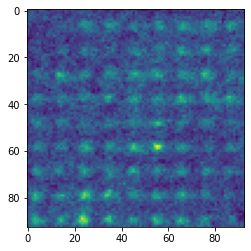

In [253]:
# fast ica on just one sub-image
i=j=0
plt.imshow((crop_img.mean(0)/crop_bg.mean(0))[i*93:(i+1)*93,j*93:(j+1)*93])#,cmap='Reds',vmin=0.16)

In [227]:
np.amax(crop_img[:78]),np.amin(crop_img[:78]),

(26412, 3477)

In [237]:
(crop_img[:sites]/np.amax(crop_img[:sites])).shape

(78, 372, 372)

In [267]:
81*16

1296

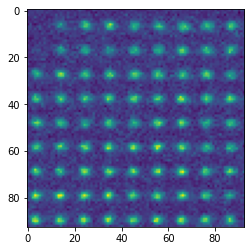

In [264]:
dx = dy = 93
frames = 200
sites = 81
sub_img = crop_img[:frames, :dx, :dy]/crop_bg[:frames, :dx, :dy].mean(0)
sub_bg = crop_bg[:sites, :dx, :dy]
# plt.imshow(subarr)
ica_img = ica_project(sub_img,whiten=True, components=sites)
ica_bg = ica_project(sub_bg)

plt.imshow(ica_img)

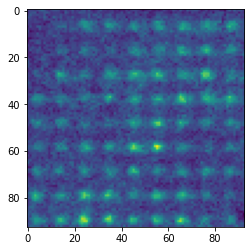

In [256]:
plt.imshow(sub_img.mean(0))

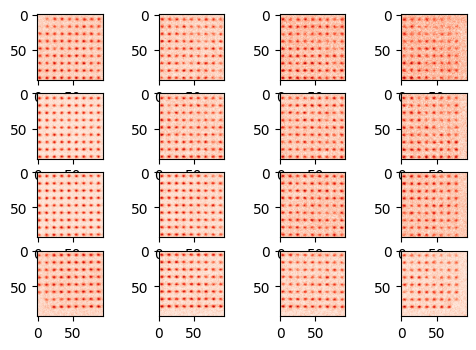

In [271]:
fig,axes = plt.subplots(nrows=4,ncols=4,dpi=100)

ica_img = np.empty(crop_img[0].shape,float)

dx = dy = 93
frames = 200
sites_arr = np.array([[81,81,81,72],
                      [81,81,81,72],
                      [81,81,81,72],
                      [72,72,72,64]])

for i in range(4):
    for j in range(4):
        
        sub_img = crop_img[:frames, i*dx:(i+1)*dx, j*dy:(j+1)*dy]/crop_bg[:frames, i*dx:(i+1)*dx, j*dy:(j+1)*dy].mean(0)
        ica_sub = ica_project(sub_img,whiten=True, components=sites_arr[i,j])
        ica_img[i*dx:(i+1)*dx, j*dy:(j+1)*dy] = ica_sub
        
        axes[i,j].imshow(ica_sub,cmap='Reds')

wrote file to ./trap_array_data/ica_img_20211209_reds_no_frame.png


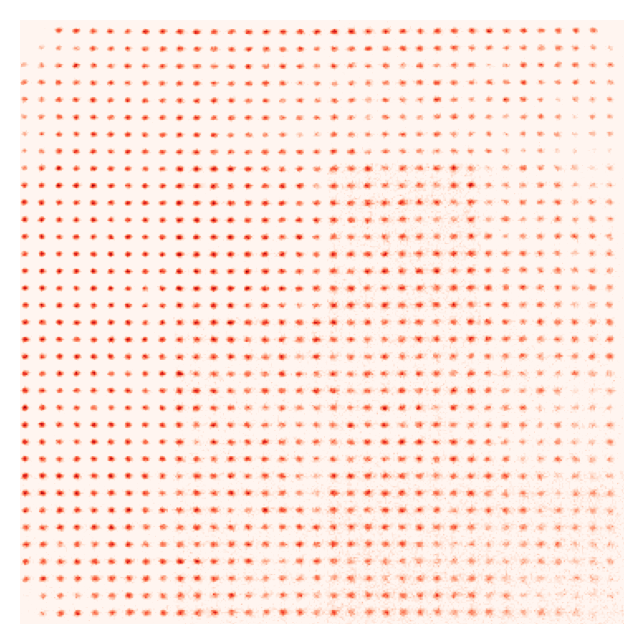

In [314]:
plt.figure(dpi=200)
plt.imshow(ica_img,cmap='Reds',vmin=0.0375)
plt.xlim((0,365))
plt.ylim((0,365))

plt.xticks([])
plt.yticks([])
plt.box(on=None)
# fname = './'+imdir+'/ica_img_20211209_reds_no_frame.png'
# plt.savefig(fname,bbox_inches='tight')
# print(f"wrote file to {fname}")

In [278]:
np.amax(ica_img)

0.0960632574525508